In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def add_labels(x, y, labels, ax=None):
    """Ajoute les étiquettes `labels` aux endroits définis par `x` et `y`."""
    if ax is None:
        ax = plt.gca()
    for x, y, label in zip(x, y, labels):
        ax.annotate(
            label, [x, y], xytext=(10, -5), textcoords="offset points",
        )
    return ax

# Travaux pratiques
## Introduction : ACP des données de notes

In [3]:
# Q1
notes = pd.read_csv("TP04_Analyse_en_composantes_principales/data/notes.txt", sep="\s+")
cls = PCA(n_components=5)
pcs = cls.fit_transform(notes)
cls.components_

array([[ 0.51453535,  0.50698853,  0.49235486,  0.48462835,  0.03062778],
       [-0.56694916, -0.37199576,  0.65035356,  0.32323853,  0.11289333],
       [ 0.05132308,  0.01445296, -0.10806565, -0.02254331,  0.99245689],
       [-0.28874852,  0.55305647,  0.39373536, -0.67419539,  0.03443659],
       [-0.57254891,  0.54635285, -0.40978192,  0.45343643, -0.01266839]])

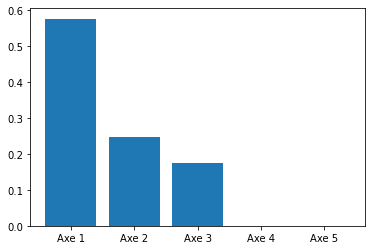

In [4]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

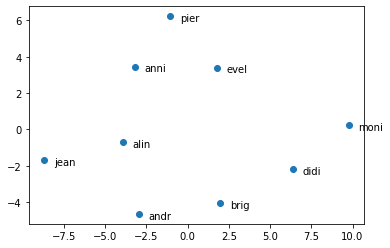

In [5]:
# Q2
plt.scatter(pcs[:, 0], pcs[:, 1])
add_labels(pcs[:, 0], pcs[:, 1], notes.index)
plt.show()

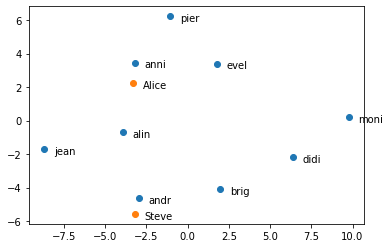

In [6]:
# Q3
plt.scatter(pcs[:, 0], pcs[:, 1])
add_labels(pcs[:, 0], pcs[:, 1], notes.index)
notes1 = pd.DataFrame([[8.0, 6.0, 10.0, 9, 14], [10, 11, 4.5, 8.0, 6]],
                        columns=notes.columns,
                        index=["Alice", "Steve"],
                        )
pcs1 = cls.transform(notes1)
plt.scatter(pcs1[:, 0], pcs1[:, 1])
add_labels(pcs1[:, 0], pcs1[:, 1], notes1.index)
plt.show()

## ACP sur les données « Crabs »

In [8]:
# Q4
crabs = pd.read_csv("TP04_Analyse_en_composantes_principales/data/crabs.csv", sep="\s+")
crabsquant = crabs.iloc[:, 3:8]
crabsquant.head()

,FL,RW,CL,CW,BD
0,8.1,6.7,16.1,19.0,7.0
1,8.8,7.7,18.1,20.8,7.4
2,9.2,7.8,19.0,22.4,7.7
3,9.6,7.9,20.1,23.1,8.2
4,9.8,8.0,20.3,23.0,8.2


### Analyse exploratoire

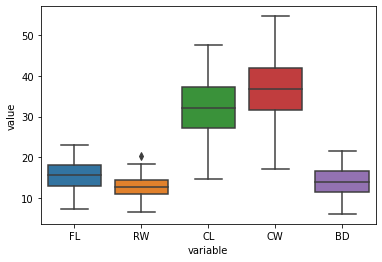

In [9]:
crabs_long = crabs.melt(id_vars=["sp", "sex", "index"])
sns.boxplot(x="variable", y="value", data=crabs_long)
plt.show()

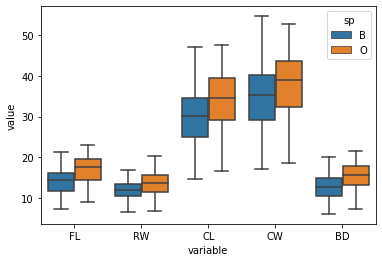

In [10]:
sns.boxplot(x="variable", y="value", hue="sp", data=crabs_long)
plt.show()

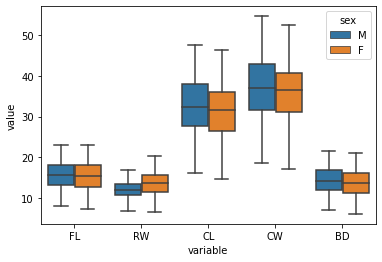

In [14]:
sns.boxplot(x="variable", y="value", hue="sex", data=crabs_long)
plt.show()

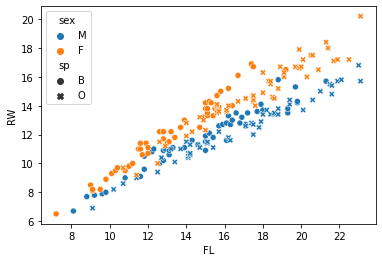

In [15]:
sns.scatterplot(x="FL", y="RW", data=crabs, hue="sex", style="sp")
plt.show()

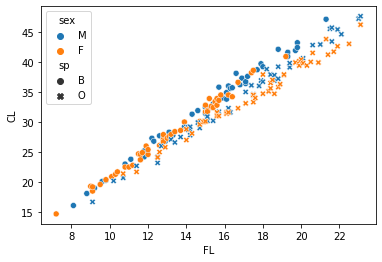

In [16]:
sns.scatterplot(x="FL", y="CL", data=crabs, hue="sex", style="sp")
plt.show()

In [17]:
# Q6
taille1 = crabs.FL + crabs.RW + crabs.CL + crabs.CW + crabs.BD

idx = np.argmax(crabsquant.corr().sum(axis=0).to_numpy())
taille2 = crabsquant.iloc[:, idx]

crabsquant2 = crabsquant.div(taille1, axis=0)

# crabsquant2 = crabsquant.div(taille2, axis=0)
# crabsquant2 = crabsquant2.drop(crabsquant2.columns[idx], axis=1)

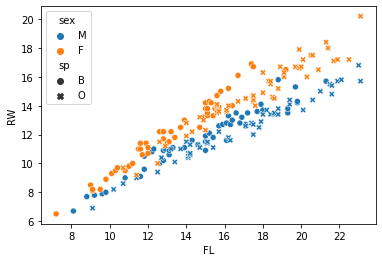

In [22]:
sns.scatterplot(x="FL", y="RW", data=crabs, hue="sex", style="sp")
plt.show()

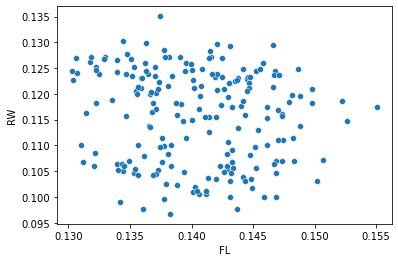

In [21]:
# crabsquant2_long = crabsquant2.melt(id_vars=["sp", "sex", "index"])
sns.scatterplot(x="FL", y="RW", data=crabsquant2)
plt.show()

### ACP des données « Crabs »

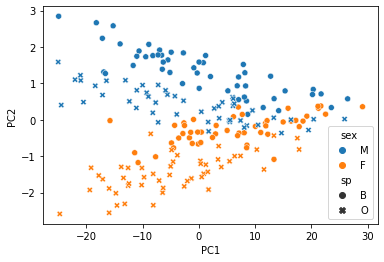

In [23]:
cls = PCA(n_components=5)
pcs_crabs = cls.fit_transform(crabsquant)
df_crabs = pd.DataFrame(pcs_crabs, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=crabs.sex, style=crabs.sp, data=df_crabs)
plt.show()

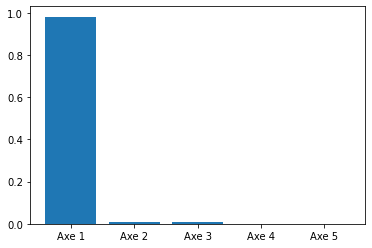

In [24]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

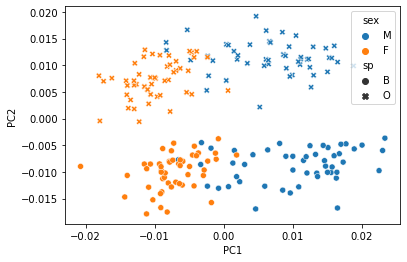

In [25]:
cls = PCA(n_components=5)
pcs_crabs2 = cls.fit_transform(crabsquant2)
df_crabs2 = pd.DataFrame(pcs_crabs2, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=crabs.sex, style=crabs.sp, data=df_crabs2)
plt.show()

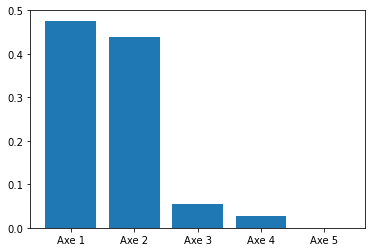

In [26]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

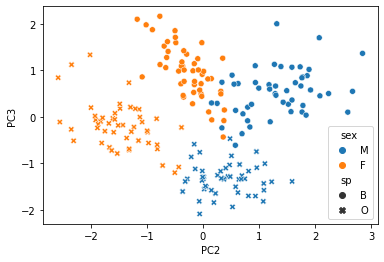

In [27]:
sns.scatterplot(x="PC2", y="PC3", hue=crabs.sex, style=crabs.sp, data=df_crabs)
plt.show()

# Exercices
## Exercice pratico-théorique : ACP « à la main »

In [28]:
# Q7
df = pd.read_csv("TP04_Analyse_en_composantes_principales/data/notes.txt", sep="\s+")
notes = df.to_numpy()
n, p = notes.shape
M = np.eye(p)
Dp = 1/n * np.eye(n)

In [29]:
# Q8
notes_mean = notes.mean(axis=0)
notes = notes - notes_mean

In [30]:
# Q9
import scipy.linalg as linalg

V = notes.T @ Dp @ notes
valp, vecp = linalg.eigh(V @ M)
valp = valp[::-1] # Ordre décroissant
vecp = vecp[:, ::-1]

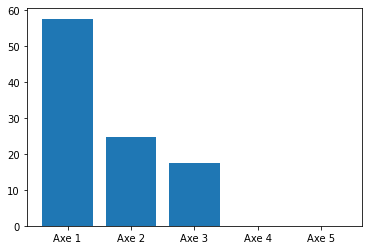

In [31]:
# Q10
percents = 100 * valp / sum(valp)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], percents)
plt.show()

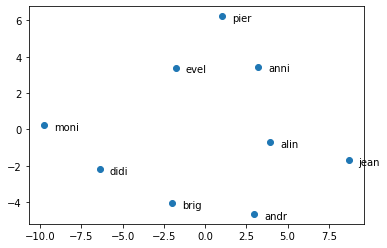

In [32]:
# Q11
U = vecp
C = notes @ M @ U
plt.scatter(-C[:, 0], -C[:, 1])
add_labels(-C[:, 0], -C[:, 1], df.index)
plt.show()

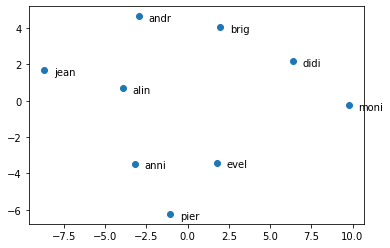

In [33]:
# Q12
W = notes @ M @ notes.T

valp, vecp = linalg.eigh(W @ Dp)

valp = np.maximum(valp, 0)
valp = valp[::-1] # Ordre décroissant
vecp = vecp[:, ::-1]

C = vecp * np.sqrt((valp / np.sum(Dp @ vecp**2, axis=0)))

plt.scatter(C[:, 0], C[:, 1])
add_labels(C[:, 0], C[:, 1], df.index)
plt.show()